In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from TwoLayers_NN_Algo import *

In [2]:
train = pd.read_csv('train.csv')
train.head()

,patient_id,Age,Gender,Prescription_period,Diabetes,Alcoholism,HyperTension,Smokes,Tuberculosis,Sms_Reminder,Adherence
0,107339,32,F,15,0,0,0,0,0,0,Yes
1,157372,58,F,68,0,0,0,0,0,1,No
2,84080,47,F,41,0,0,0,0,0,1,No
3,76807,52,F,3,0,0,0,1,0,0,Yes
4,18730,56,M,1,0,0,1,0,0,0,Yes


In [3]:
train.describe(include='all')

,patient_id,Age,Gender,Prescription_period,Diabetes,Alcoholism,HyperTension,Smokes,Tuberculosis,Sms_Reminder,Adherence
count,144169.000000,144169.000000,144169,144169.000000,144169.000000,144169.000000,144169.000000,144169.000000,144169.000000,144169.000000,144169
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
freq,NaN,NaN,96375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100657
mean,90182.699693,37.794117,NaN,54.662001,0.078325,0.025123,0.216413,0.052619,0.000333,0.573653,NaN
std,52005.229692,22.844295,NaN,35.723263,0.268683,0.156500,0.411800,0.223272,0.018244,0.499696,NaN
min,1.000000,0.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,45212.000000,19.000000,NaN,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,90199.000000,38.000000,NaN,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN
75%,135280.000000,56.000000,NaN,86.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144169 entries, 0 to 144168
Data columns (total 11 columns):
patient_id             144169 non-null int64
Age                    144169 non-null int64
Gender                 144169 non-null object
Prescription_period    144169 non-null int64
Diabetes               144169 non-null int64
Alcoholism             144169 non-null int64
HyperTension           144169 non-null int64
Smokes                 144169 non-null int64
Tuberculosis           144169 non-null int64
Sms_Reminder           144169 non-null int64
Adherence              144169 non-null object
dtypes: int64(9), object(2)
memory usage: 12.1+ MB


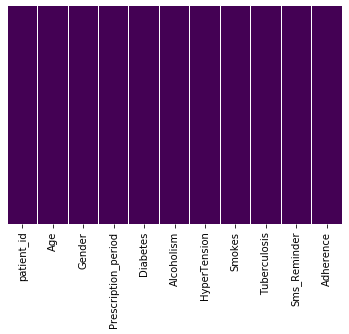

In [5]:
#Missing Data
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
# No null value

# Data Understanding

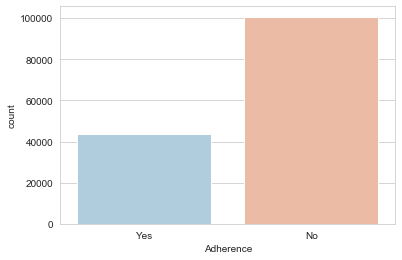

In [6]:
sns.set_style('whitegrid')
sns.countplot(x='Adherence',data=train,palette='RdBu_r')

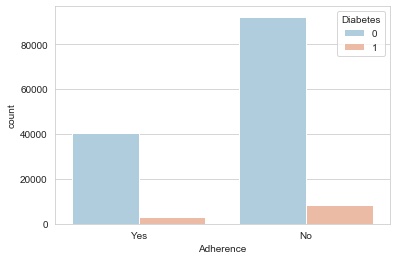

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='Adherence',hue='Diabetes',data=train,palette='RdBu_r')

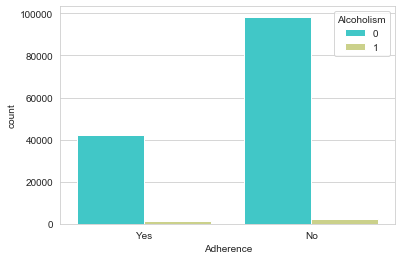

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Adherence',hue='Alcoholism',data=train,palette='rainbow')

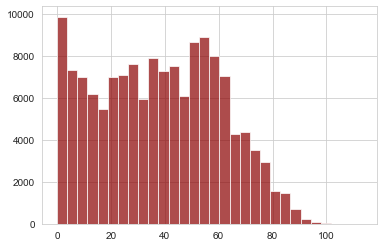

In [9]:
train['Age'].hist(bins=30,color='darkred',alpha=0.7)

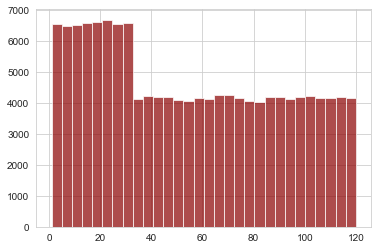

In [10]:
train['Prescription_period'].hist(bins=30,color='darkred',alpha=0.7)

# Data Cleaning
We want to fill in missing data instead of just dropping the missing data rows. One way to do this is by filling in the mean of that column. Note: Here we don't have missing value. So, this step is not needed here. But for general purpose we are doing it.

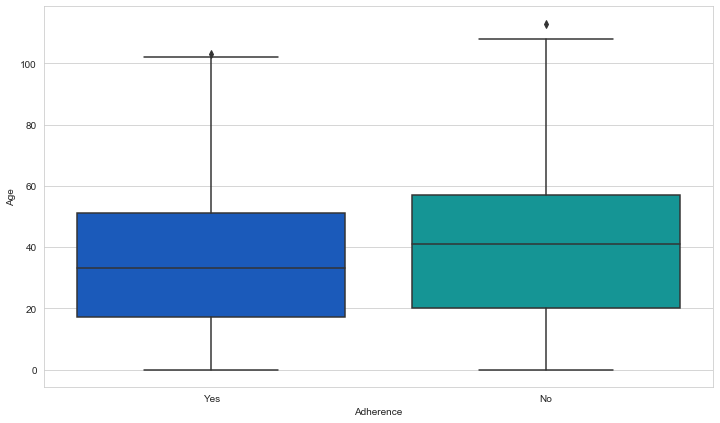

In [11]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Adherence',y='Age',data=train,palette='winter')

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144169 entries, 0 to 144168
Data columns (total 11 columns):
patient_id             144169 non-null int64
Age                    144169 non-null int64
Gender                 144169 non-null object
Prescription_period    144169 non-null int64
Diabetes               144169 non-null int64
Alcoholism             144169 non-null int64
HyperTension           144169 non-null int64
Smokes                 144169 non-null int64
Tuberculosis           144169 non-null int64
Sms_Reminder           144169 non-null int64
Adherence              144169 non-null object
dtypes: int64(9), object(2)
memory usage: 12.1+ MB


In [13]:
dummy_var = {'Gender':     {'F': 0, 'M': 1},
             'Adherence': {'No': 0, 'Yes':1 }}

In [14]:
#Converting data type object to int. So now all the columns are of int datatype.
train_int = train.replace(dummy_var)
train_int.head()

,patient_id,Age,Gender,Prescription_period,Diabetes,Alcoholism,HyperTension,Smokes,Tuberculosis,Sms_Reminder,Adherence
0,107339,32,0,15,0,0,0,0,0,0,1
1,157372,58,0,68,0,0,0,0,0,1,0
2,84080,47,0,41,0,0,0,0,0,1,0
3,76807,52,0,3,0,0,0,1,0,0,1
4,18730,56,1,1,0,0,1,0,0,0,1


In [15]:
train_int.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144169 entries, 0 to 144168
Data columns (total 11 columns):
patient_id             144169 non-null int64
Age                    144169 non-null int64
Gender                 144169 non-null int64
Prescription_period    144169 non-null int64
Diabetes               144169 non-null int64
Alcoholism             144169 non-null int64
HyperTension           144169 non-null int64
Smokes                 144169 non-null int64
Tuberculosis           144169 non-null int64
Sms_Reminder           144169 non-null int64
Adherence              144169 non-null int64
dtypes: int64(11)
memory usage: 12.1 MB


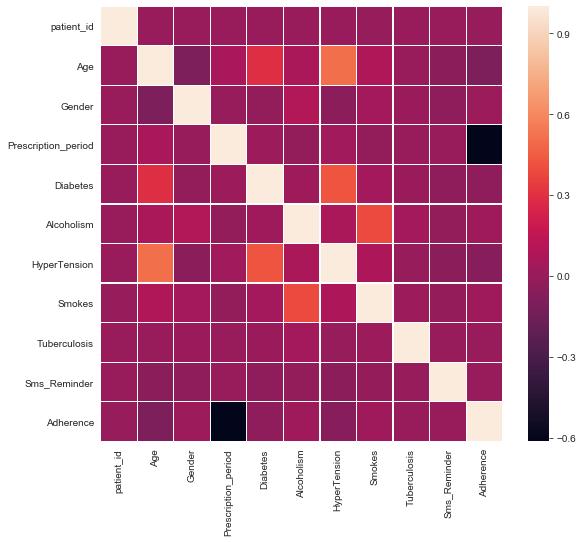

In [16]:
cor = train_int.corr(method ='pearson') 
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(cor, ax = ax, linewidths = 0.1) 

In [17]:
#From corr graph and valus(as below) it is clear that Adherence is highly corr with Prescription_period
# Also Diabetes' and 'HyperTension' are highly correlated with 'Age' so we remove these columns
# Also, same for 'Alcoholism', it is highly correlated with 'Smokes' column.
cor

,patient_id,Age,Gender,Prescription_period,Diabetes,Alcoholism,HyperTension,Smokes,Tuberculosis,Sms_Reminder,Adherence
patient_id,1.000000,-0.000724,0.000263,0.001444,-0.001548,0.001192,0.001516,-0.003372,0.002352,0.003765,-0.001978
Age,-0.000724,1.000000,-0.102198,0.060301,0.294199,0.071737,0.509821,0.091809,-0.000318,-0.052889,-0.101330
Gender,0.000263,-0.102198,1.000000,-0.004993,-0.019219,0.095209,-0.046845,0.042509,0.007339,-0.028165,0.010951
Prescription_period,0.001444,0.060301,-0.004993,1.000000,0.016110,-0.014923,0.034948,-0.016508,-0.000775,-0.000245,-0.613014
Diabetes,-0.001548,0.294199,-0.019219,0.016110,1.000000,0.022155,0.422804,0.043456,0.004585,-0.031344,-0.030485
Alcoholism,0.001192,0.071737,0.095209,-0.014923,0.022155,1.000000,0.069222,0.393529,0.040800,-0.019493,0.025763
HyperTension,0.001516,0.509821,-0.046845,0.034948,0.422804,0.069222,1.000000,0.078708,-0.002205,-0.045067,-0.060344
Smokes,-0.003372,0.091809,0.042509,-0.016508,0.043456,0.393529,0.078708,1.000000,0.016134,-0.012604,0.026018
Tuberculosis,0.002352,-0.000318,0.007339,-0.000775,0.004585,0.040800,-0.002205,0.016134,1.000000,-0.003451,0.002081
Sms_Reminder,0.003765,-0.052889,-0.028165,-0.000245,-0.031344,-0.019493,-0.045067,-0.012604,-0.003451,1.000000,-0.001506


In [18]:
Train_int = train_int.drop(['patient_id','Diabetes','Alcoholism','HyperTension'], axis=1)
Train_int.head()

,Age,Gender,Prescription_period,Smokes,Tuberculosis,Sms_Reminder,Adherence
0,32,0,15,0,0,0,1
1,58,0,68,0,0,1,0
2,47,0,41,0,0,1,0
3,52,0,3,1,0,0,1
4,56,1,1,0,0,0,1


In [19]:
Train_int.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144169 entries, 0 to 144168
Data columns (total 7 columns):
Age                    144169 non-null int64
Gender                 144169 non-null int64
Prescription_period    144169 non-null int64
Smokes                 144169 non-null int64
Tuberculosis           144169 non-null int64
Sms_Reminder           144169 non-null int64
Adherence              144169 non-null int64
dtypes: int64(7)
memory usage: 7.7 MB


In [20]:
Train_Y = np.array(Train_int['Adherence'])
Train_Y = Train_Y.reshape(1,144169)

In [21]:
Train_X = Train_int.drop('Adherence', axis=1).to_numpy()
Train_X.shape

(144169, 6)

In [22]:
Train_X = Train_X.T
Train_X.shape

(6, 144169)

# Model Formation

In [23]:
def two_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
    
    np.random.seed(1)
    grads = {}
    costs = []                              
    m = X.shape[1]                           # number of examples
    (n_x, n_h, n_y) = layers_dims
    
    parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    for i in range(0, num_iterations):
        # Forward propagation: LINEAR -> RELU -> LINEAR -> SIGMOID. Inputs: "X, W1, b1, W2, b2". Output: "A1, cache1, A2, cache2".
        A1, cache1 = linear_activation_forward(X, W1, b1, activation = "relu")
        A2, cache2 = linear_activation_forward(A1, W2, b2, activation = "sigmoid")       
        
        # Cost
        cost = compute_cost(A2, Y)

        
        # Initializing backward propagation
        dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))
        
        # Backward propagation. Inputs: "dA2, cache2, cache1". Outputs: "dA1, dW2, db2; also dA0 (not used), dW1, db1".
        dA1, dW2, db2 = linear_activation_backward(dA2, cache2, activation= "sigmoid")
        dA0, dW1, db1 = linear_activation_backward(dA1, cache1, activation= "relu")
        
        # Set grads['dWl'] to dW1, grads['db1'] to db1, grads['dW2'] to dW2, grads['db2'] to db2
        grads['dW1'] = dW1
        grads['db1'] = db1
        grads['dW2'] = dW2
        grads['db2'] = db2
        
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)

        # Retrieve W1, b1, W2, b2 from parameters
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if print_cost and i % 100 == 0:
            costs.append(cost)
       
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Cost after iteration 0: 0.696434643645838
Cost after iteration 100: 0.43130456717004123
Cost after iteration 200: 0.42569839336007725
Cost after iteration 300: 0.41878817565757265
Cost after iteration 400: 0.4111714403802151
Cost after iteration 500: 0.4052962732560062
Cost after iteration 600: 0.40174043246940105
Cost after iteration 700: 0.3993570484314363
Cost after iteration 800: 0.39736760530740634
Cost after iteration 900: 0.39550046289447616


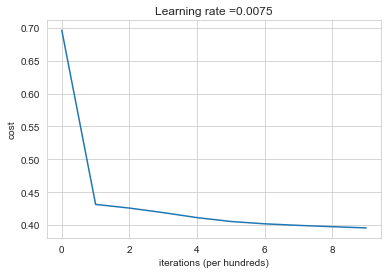

In [24]:
parameters = two_layer_model(Train_X, Train_Y, layers_dims = (6,6,1), num_iterations = 1000, print_cost=True)

In [25]:
predictions_train = predict(Train_X, parameters)

In [26]:
m = Train_X.shape[1]
print("Accuracy: "  + str(np.sum((predictions_train == Train_Y)/m)))

Accuracy: 0.8642565322642173


# Evalutate on test data set:

In [27]:
X_Test_pd = pd.read_csv('test.csv')
X_Test_pd.head()

,patient_id,Age,Gender,Prescription_period,Diabetes,Alcoholism,HyperTension,Smokes,Tuberculosis,Sms_Reminder,Adherence
0,179127,16,F,67,0,0,0,0,0,1,No
1,110505,11,M,71,0,0,0,0,0,1,No
2,105240,20,F,82,0,0,0,0,0,1,No
3,143991,61,F,64,1,0,1,0,0,1,No
4,127304,14,F,58,0,0,0,0,0,1,No


In [28]:
dummy_var_test = {'Gender': {'F': 0, 'M': 1}, 'Adherence': {'No': 0, 'Yes':1 }}

In [29]:
X_Test_pd = X_Test_pd.replace(dummy_var_test)
X_Test_pd.head()

,patient_id,Age,Gender,Prescription_period,Diabetes,Alcoholism,HyperTension,Smokes,Tuberculosis,Sms_Reminder,Adherence
0,179127,16,0,67,0,0,0,0,0,1,0
1,110505,11,1,71,0,0,0,0,0,1,0
2,105240,20,0,82,0,0,0,0,0,1,0
3,143991,61,0,64,1,0,1,0,0,1,0
4,127304,14,0,58,0,0,0,0,0,1,0


In [30]:
Y_Test = np.array(X_Test_pd['Adherence']) 
X_Test_pd = X_Test_pd.drop(['patient_id','Diabetes','Alcoholism','HyperTension','Adherence'], axis=1)
X_Test_pd.head()

,Age,Gender,Prescription_period,Smokes,Tuberculosis,Sms_Reminder
0,16,0,67,0,0,1
1,11,1,71,0,0,1
2,20,0,82,0,0,1
3,61,0,64,0,0,1
4,14,0,58,0,0,1


In [31]:
X_Test = X_Test_pd.to_numpy()

In [32]:
X_Test = X_Test.T

In [33]:
predictions_test = predict(X_Test, parameters)
predictions_test

array([[0., 0., 0., ..., 1., 1., 1.]])

In [34]:
predictions_test.shape

(1, 36043)

In [35]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

In [36]:
results = confusion_matrix(Y_Test.reshape(36043,), predictions_test.reshape(36043,)) 
print('Confusion Matrix :')
print(results)
print('Accuracy Score :',accuracy_score(Y_Test.reshape(36043,), predictions_test.reshape(36043,)))
print('Report : ')
print(classification_report(Y_Test.reshape(36043,), predictions_test.reshape(36043,)))

Confusion Matrix :
[[21634  3531]
 [ 1375  9503]]
Accuracy Score : 0.8638848042615764
Report : 
              precision    recall  f1-score   support

           0       0.94      0.86      0.90     25165
           1       0.73      0.87      0.79     10878

   micro avg       0.86      0.86      0.86     36043
   macro avg       0.83      0.87      0.85     36043
weighted avg       0.88      0.86      0.87     36043



#Thank you